<b>Implementation of DC DP Means Clustering Algorithm in Python</b>

<b>Install necessary package

In [ ]:
!pip install numpy matplotlib Pillow

In [1]:
#Import the packages
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:


class DC_DP:
    def __init__(self, lmbda=7):
        '''Initialize the class with default lambda and convergence criteria.'''
        self.lmbda = lmbda
        self._Convergence_criteria = 0

    def fit(self, X):
        # Set the initial no of clusters to 1
        # Set Centroid to mean of input data
        # Set defaults labels to 0
        self.num_clusters = 1
        self.centroids = X.mean(axis=0)[np.newaxis,:]
        self.labels = np.zeros(len(X)) 
        # Use while loop to control convergence
        # Use i_max to save the index of instance whose distance from nearest
        # cluster is greater than lambda in one iteration
        # Use d_max to save the distance of that instance
        while self._Convergence_criteria < 200:
            self.i_max = -1
            self.d_max = -1
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            # If the distance of instance from nearest cluster is greater than lambda
            # Set i_max to d, set d_max to distane from nearest cluster
            for d in range(len(distances.T)):
                if distances[np.argmin(distances[...,d]),d] > self.lmbda:
                    self.i_max = d
                    self.d_max = distances[np.argmin(distances[...,d]),d]
            # After assignment step is complete, if there is one instance
            # whose d_max is greater than lambda, create a new cluster
            # Initialize the cluster with that instance as the new centroid
            # of that cluster
            # Set the label of cluster as (num cluster - 1)
            if self.d_max > self.lmbda:
                self.num_clusters += 1
                self.centroids = np.vstack((self.centroids, X[self.i_max]))
                self.labels[self.i_max] = self.num_clusters - 1
            # For instances in same cluster, calculate their centroid and update 
            for j in range(self.num_clusters):
                self.centroids[j] = X[self.labels == j].mean(axis=0)
            self._Convergence_criteria += 1
    def predict(self, X):
        '''This function predict the label of the instance by calculating the
        distance from the nearest cluster'''
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

<b>Generating 2D synthetic dataset</b>

In [3]:
# Example usage
np.random.seed(42)
N = 1000
K = 3
means = np.array([[0, 0], [5, 5], [10, 0]])
cov = np.eye(2)
# this is a 3x1000 array of random multivariate normal distributions
X = np.vstack([np.random.multivariate_normal(mean, cov, int(N / K)) for mean in means])

<b>Testing dc dp for lambda=2</b>

The centroids of clusters are:
 [[-0.51916429 -1.05188006]
 [ 9.57955985  0.47260196]
 [10.98439879  0.80174364]
 [ 9.90991046 -0.61582084]
 [ 4.79189341  5.07538797]
 [11.21392009 -0.54941264]
 [ 5.45272101  3.78302736]
 [ 8.37422042  0.23108198]
 [10.08153868  1.70733742]
 [ 9.20597633 -1.79721563]
 [ 5.96893627  5.54765404]
 [ 4.92620049  6.56394319]
 [ 4.06687027  3.82945758]
 [ 3.66062439  5.92143619]
 [ 6.72009183  4.45338607]
 [ 0.26128483 -0.4125122 ]
 [-0.91676635  0.54213855]
 [ 0.19484822  0.61869935]
 [ 1.21770897 -1.10877699]
 [ 1.57206411  0.51266703]
 [-1.88544561 -0.29444202]
 [ 0.26345752  1.7385993 ]
 [ 0.51504769  3.85273149]]



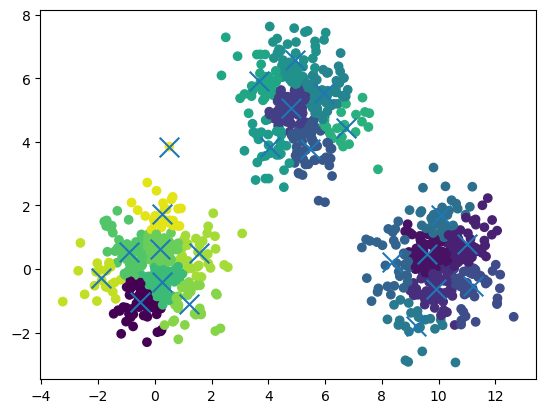

In [5]:
dcdp = DC_DP(lmbda=2)
dcdp.fit(X)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=dcdp.labels)
plt.scatter(dcdp.centroids[:,0], dcdp.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing dc dp for lambda=4</b>

The centroids of clusters are:
 [[-6.24189782e-03 -7.37147324e-03]
 [ 1.00269402e+01  9.17913538e-02]
 [ 4.79772973e+00  4.08599768e+00]
 [ 6.13406454e+00  5.10673502e+00]
 [ 4.56514720e+00  6.02777893e+00]]



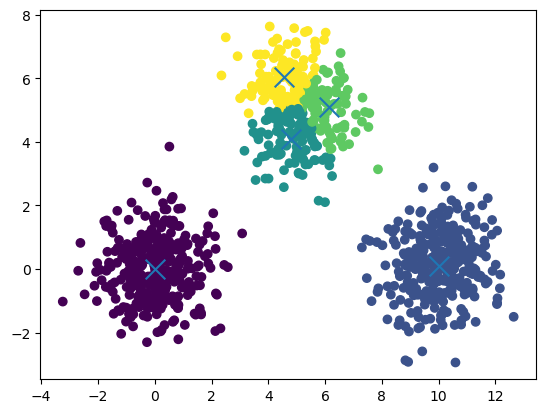

In [6]:
dcdp = DC_DP(lmbda=4)
dcdp.fit(X)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=dcdp.labels)
plt.scatter(dcdp.centroids[:,0], dcdp.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing dc dp for lambda=7</b>

The centroids of clusters are:
 [[ 5.09426238e+00  5.07397312e+00]
 [ 1.00269402e+01  9.17913538e-02]
 [-6.24189782e-03 -7.37147324e-03]]



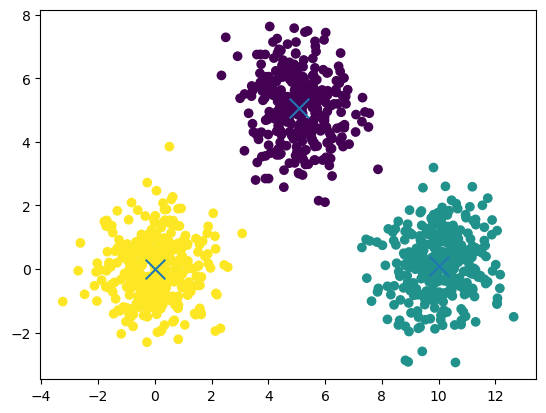

In [8]:
dcdp = DC_DP(lmbda=7)
dcdp.fit(X)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=dcdp.labels)
plt.scatter(dcdp.centroids[:,0], dcdp.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing dc dp for lambda=9</b>

The centroids of clusters are:
 [[5.03338259 1.7244515 ]]



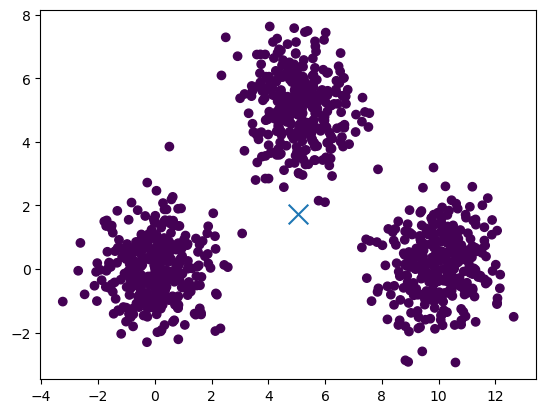

In [9]:
dcdp = DC_DP(lmbda=9)
dcdp.fit(X)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

plt.scatter(X[:,0], X[:,1], c=dcdp.labels)
plt.scatter(dcdp.centroids[:,0], dcdp.centroids[:,1], marker='x', s=200)
plt.show()

<b>Testing DC DP Means algorithm on a Mandril image</b>

<b>Load the mandril image using Pillow library</b>

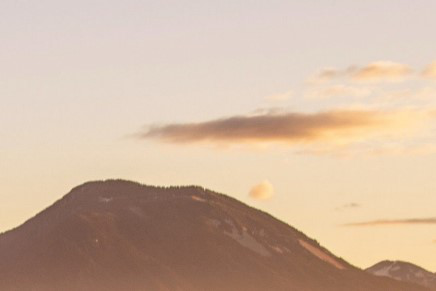

In [11]:
mandril = Image.open('./Screenshot 2023-04-24 195829.jpg')
mandril

<b>Convert the image into numpy array of rgb values</b>

In [12]:
mandril_rgb = np.array(mandril.getdata())
mandril_rgb

array([[218, 207, 205],
       [218, 207, 205],
       [217, 206, 204],
       ...,
       [158, 113,  84],
       [159, 114,  85],
       [160, 115,  86]])

<b>Train the DC DP means algorithm on mandril rgb values for lambda=50</b>

In [13]:
dcdp = DC_DP(lmbda=50)
dcdp.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

The centroids of clusters are:
 [[226.90019765 212.48525624 202.96550141]
 [126.92011006  92.50778755  77.65484204]
 [185.25464576 141.98751452 112.47270616]
 [241.16450808 215.41350322 180.90403258]
 [145.0324515  104.74559083  82.9361552 ]
 [230.21478382 187.79386332 142.29456067]]



<b>Replace the color of each pixel with value of centroid of cluster</b>

In [15]:
rgb_means_img.shape

(126876, 3)

In [16]:
rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = dcdp.centroids[dcdp.labels[i]]
display_image = np.array(rgb_means_img.reshape((97*3,109*4,3)), dtype=np.uint8)

<b>Use Plotly library to plot the image from rgb values array</b>

In [17]:
import plotly.express as px
fig = px.imshow(display_image)
fig.show()

<b>Train the DC DP means algorithm on mandril rgb values for lambda=100</b>

The centroids of clusters are:
 [[ 55.26880755  59.8699753   52.89681114]
 [135.12138989 129.994284   122.15448255]
 [ 18.23975026  18.00405827  18.32029136]
 [ 99.29240067  95.45274527  86.64819339]
 [175.32511671 171.36078431 168.54528478]
 [210.22535211 211.34037559 228.35211268]]




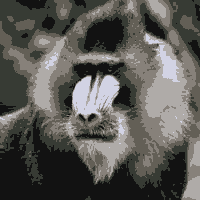

In [9]:
dcdp = DC_DP(lmbda=100)
dcdp.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = dcdp.centroids[dcdp.labels[i]]
display_image = np.array(rgb_means_img.reshape((200,200,3)), dtype=np.uint8)

fig = px.imshow(display_image)
fig.show()

<b>Train the DC DP means algorithm on mandril rgb values for lambda=150</b>

In [13]:
dcdp = DC_DP(lmbda=150)
dcdp.fit(mandril_rgb)
print(f'The centroids of clusters are:\n {dcdp.centroids}\n')

rgb_means_img = np.array(mandril_rgb)
for i in range(len(mandril_rgb)):
    rgb_means_img[i] = dcdp.centroids[dcdp.labels[i]]
display_image = np.array(rgb_means_img.reshape((200,200,3)), dtype=np.uint8)

fig = px.imshow(display_image)
fig.show()

The centroids of clusters are:
 [[107.10409125 103.71245134  95.14404754]
 [ 32.5148179   34.37062604  31.63413473]
 [177.74307423 174.69339568 175.35838691]]

